# Classification with Sklearn

In this section, we will introcude how to implement claffier with sklaern.

This example shows how scikit-learn can be used to recognize iris

## 数据导入


In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# 加载数据集
iris = load_iris()                                                              # 使用 load_iris 函数加载鸢尾花数据集，返回一个 Bunch 对象
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)                 # 将数据集的特征数据转换为 pandas DataFrame，并指定列名为特征名称



In [2]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris.feature_names
# 花萼长度(Sepal Length)
# 花萼宽度(Sepal Width)
# 花瓣长度(Petal Length)
# 花瓣宽度(Petal Width)


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

# 每个样本属于三个类别之一
# Setosa
# Versicolor
# Virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
data['target'] = iris.target                                                    # 在 DataFrame 中添加一列 'target'，对应每个样本的目标标签
data['target_names'] = data['target'].apply(lambda x: iris.target_names[x])     # 添加一列 'target_names'，通过映射 'target' 列的值来获取对应的目标名称

# 查看数据
print(data.head())      # 查看数据集前五行数据
print('-')
print(data.info())      # 查看数据集的基本信息
print('-')
print(data.describe())  # 查看数据集的统计信息

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_names  
0       0       setosa  
1       0       setosa  
2       0       setosa  
3       0       setosa  
4       0       setosa  
-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 n

## 数据可视化


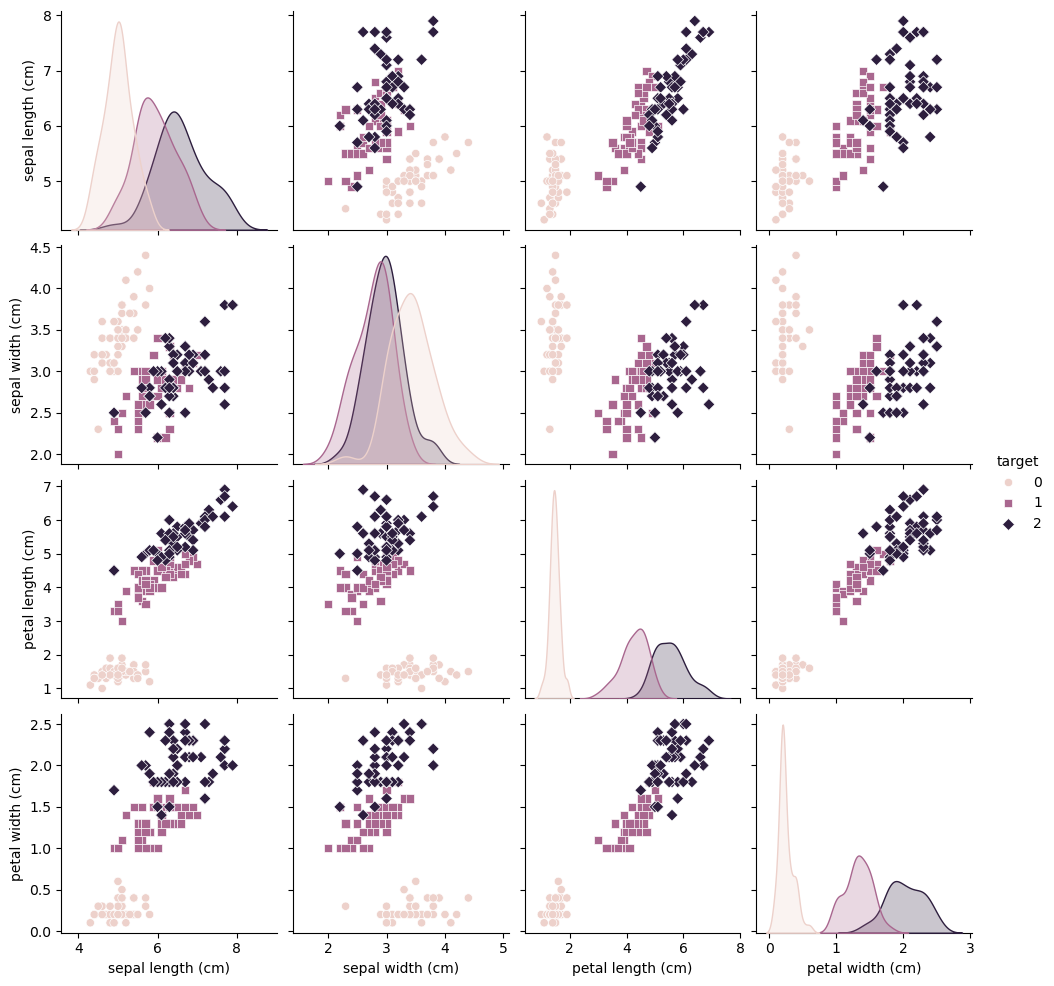

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制特征分布图
sns.pairplot(data, hue='target', markers=["o", "s", "D"])  # 使用 seaborn 库的 pairplot 函数绘制散点图矩阵，根据 'target' 列着色，并使用不同的标记
plt.show()                                                 # 显示图形


## 数据预处理


In [8]:
from sklearn.preprocessing import StandardScaler
# 检查是否有缺失值
print(data.isnull().sum())  # 打印每列的缺失值数量，以检查数据集中是否存在缺失值

# 标准化特征值
scaler = StandardScaler()                                                  # 创建一个 StandardScaler 对象
data[iris.feature_names] = scaler.fit_transform(data[iris.feature_names])  # 对特征列进行标准化处理，使其均值为 0，标准差为 1




sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_names         0
dtype: int64


In [9]:
# 查看标准化后的数据

data.head()   # 打印标准化后的数据集的前五行，查看标准化效果

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,-0.900681,1.019004,-1.340227,-1.315444,0,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,0,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,0,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,0,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,0,setosa


## 数据分割


In [10]:
from sklearn.model_selection import train_test_split

#分割数据集
X=data[iris.feature_names]
y=data['target']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25)


# 查看分割后的数据集大小
print(f"训练集大小: {x_train.shape[0]}, 测试集大小: {x_test.shape[0]}")  # 打印训练集和测试集的大小

训练集大小: 105, 测试集大小: 45


## 选择模型


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Kn_c=KNeighborsClassifier(n_neighbors=3)  #实例化模型


#训练模型
Kn_c.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

## 评估模型

[[17  0  0]
 [ 0 15  1]
 [ 0  1 11]]


<Axes: >

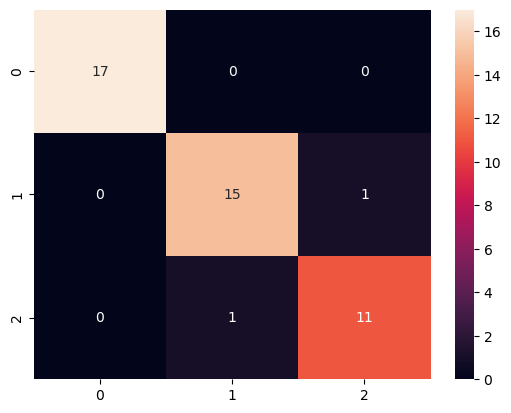

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

f,ax=plt.subplots()

#一般使用混淆矩阵
y_pred=Kn_c.predict(x_test)


#计算混淆矩阵
cm=confusion_matrix(y_test,y_pred,labels=[0,1,2])

print(cm)
#画图
sns.heatmap(cm,annot=True,ax=ax)


In [13]:
#为什么会使用混淆矩阵？

#如何理解混淆矩阵

#准确率看起来是一个很好的来判断模型的办法

#但是当数据有偏的时候往往比较片面

#准确率:关注事件预测对了的概率 TP/(TP+FP)

#召回率:在已发生的事件中正确预测的比例 TP/(TP+FN)

## 模型优化（调参）


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# 定义参数范围
param_grid = {'n_neighbors': range(1, 20)}  # 创建一个参数字典，设置 'n_neighbors' 参数的取值范围为 1 到 19

# 网格搜索
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)  # 创建一个 GridSearchCV 对象，使用 KNeighborsClassifier 和定义的参数范围，设置交叉验证折数为 5
grid_search.fit(x_train, y_train)                                     # 使用训练数据进行网格搜索，以找到最佳参数组合

# 最优参数
print(f"Best parameters: {grid_search.best_params_}")  # 打印通过网格搜索找到的最优参数
print('-')

# 使用最优参数训练模型
knn_best = grid_search.best_estimator_  # 获取使用最优参数训练的最佳模型
y_pred_best = knn_best.predict(x_test)  # 使用最佳模型对测试数据进行预测

# 评估模型
print(f"Accuracy(best): {accuracy_score(y_test, y_pred)}")                      # （优化后）计算并打印模型在测试集上的准确率
print('-')
print("Classification Report(best):\n", classification_report(y_test, y_pred))  # (优化后)打印分类报告,包括精确率、召回率、F1 分数等
print('-')
print("Confusion Matrix(best):\n", confusion_matrix(y_test, y_pred))            # （优化后）打印混淆矩阵，显示真实标签和预测标签之间的关系
print('-')


Best parameters: {'n_neighbors': 15}
-
Accuracy(best): 0.9555555555555556
-
Classification Report(best):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.94      0.94        16
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

-
Confusion Matrix(best):
 [[17  0  0]
 [ 0 15  1]
 [ 0  1 11]]
-


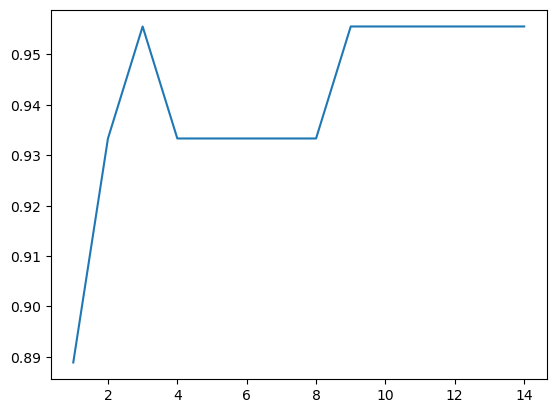

In [14]:
acc_list=[]
for paramters in range(1,15):
    kn_model=KNeighborsClassifier(n_neighbors=paramters)
    kn_model.fit(x_train,y_train)
    y_pred=kn_model.predict(x_test)
    
    Acc=accuracy_score(y_test,y_pred)
    acc_list.append(Acc)

plt.plot(range(1,15),acc_list)


## 可视化决策边界


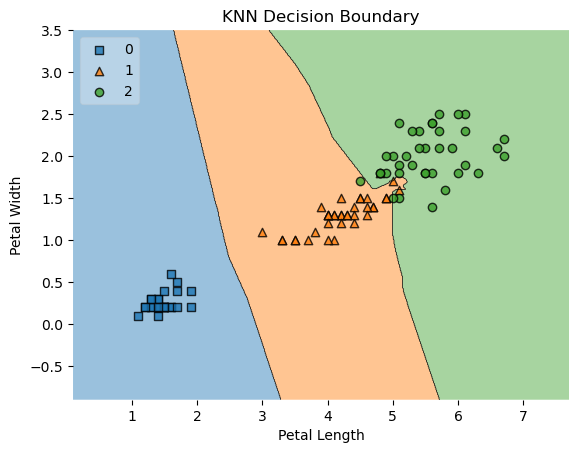

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions

# 只使用两个特征
X = iris.data[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练模型
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# 绘制决策边界
plot_decision_regions(X_train, y_train.to_numpy(), clf=model, legend=2)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('KNN Decision Boundary')
plt.show()

1. 网格搜索的基本概念

超参数：模型训练前需要设置的参数（如学习率、正则化系数、树的深度等），不能通过训练数据直接学习。

网格搜索：在指定的超参数空间中，穷举所有可能的超参数组合，通过交叉验证评估每组参数的性能，最终选择最优组合

2. 网格搜索的步骤

定义超参数空间：
列出需要调优的超参数及其候选值。
例如：

学习率：[0.01, 0.1, 1.0]

正则化系数：[0.1, 1.0, 10.0]

树的深度：[3, 5, 7]

创建参数网格：

生成所有可能的超参数组合。
例如：
{'learning_rate': 0.01, 'reg_lambda': 0.1, 'max_depth': 3}
{'learning_rate': 0.01, 'reg_lambda': 0.1, 'max_depth': 5}
{'learning_rate': 0.01, 'reg_lambda': 0.1, 'max_depth': 7}


交叉验证评估：
对每组超参数组合，使用交叉验证评估模型性能（如准确率、F1分数等）。
交叉验证可以减少模型评估的方差。

选择最优参数：
根据评估结果，选择性能最好的超参数组合。

训练最终模型：
使用最优超参数组合在整个训练集上训练最终模型。

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# 定义超参数网格
param_grid = {
    'C': [0.1, 1, 10],  # 正则化参数
    'kernel': ['linear', 'rbf'],  # 核函数
    'gamma': ['scale', 'auto']  # 核函数系数
}

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',  # 评估指标
    cv=5,  # 交叉验证折数
    verbose=1,  # 输出详细信息
    
)

# 在训练集上执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最优参数
print("Best parameters found: ", grid_search.best_params_)

# 使用最优参数在测试集上评估模型
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test set accuracy: ", accuracy_score(y_test, y_pred))


NameError: name 'X_train' is not defined